In [128]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [129]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

#合并数据集
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)
df_all.describe()

# PassengerId => 乘客ID
# Pclass => 乘客等级(1/2/3等舱位)
# Name => 乘客姓名
# Sex => 性别
# Age => 年龄
# SibSp => 堂兄弟/妹个数
# Parch => 父母与小孩个数
# Ticket => 船票信息
# Fare => 票价
# Cabin => 客舱
# Embarked => 登船港口

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [130]:
# 展示所有种类型特征
df_all.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [131]:
df_all.info()
df_all.head(5)


#上面的数据告诉我们，训练数据中总共有1309名乘客，但是很不幸，我们有些属性的数据不全，比如说：

# Age（年龄）属性只有1046名乘客有记录
# Cabin（客舱）更是只有295名乘客是已知的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


粗略观察数据

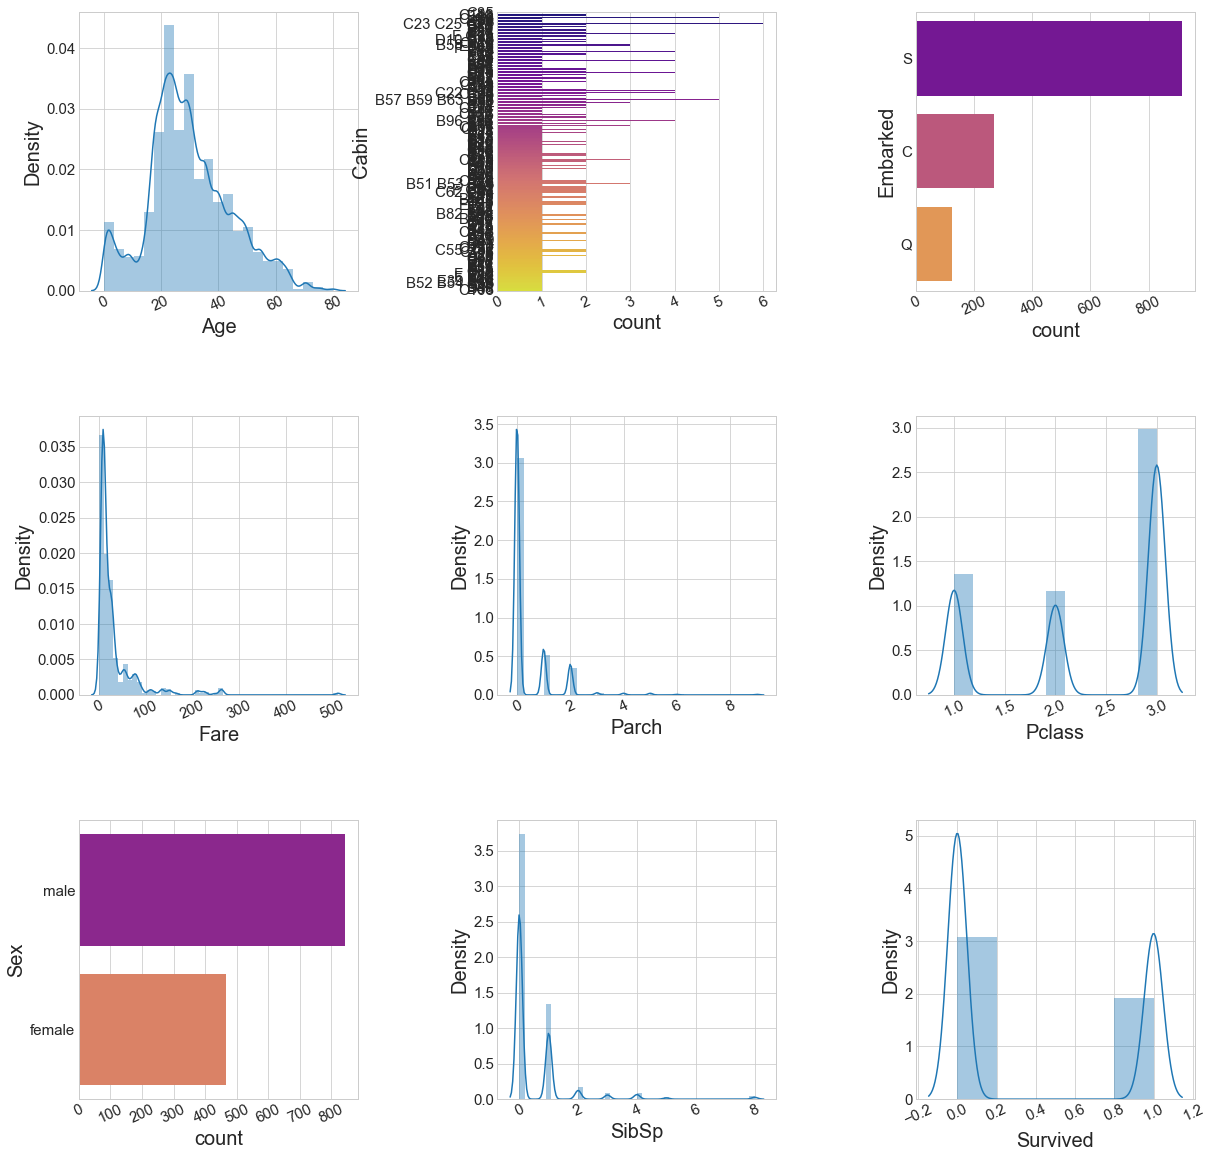

In [132]:
# 单特征展示Have a glance at data
import math
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)

    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        #ax.set_title(column)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset,palette='plasma')
            plt.xticks(rotation=25)
        else:
            #直方图，频数
            
            g = sns.distplot(dataset[column],kde_kws={'bw': 0.1})
            plt.ylabel(ylabel='Density',fontsize=20)
            plt.xticks(rotation=25)
            
    
plot_distribution(df_all[['Age','Cabin','Embarked','Fare','Parch','Pclass','Sex','SibSp','Survived']], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

查看在不同获救情况下，性别与年龄之间的关系

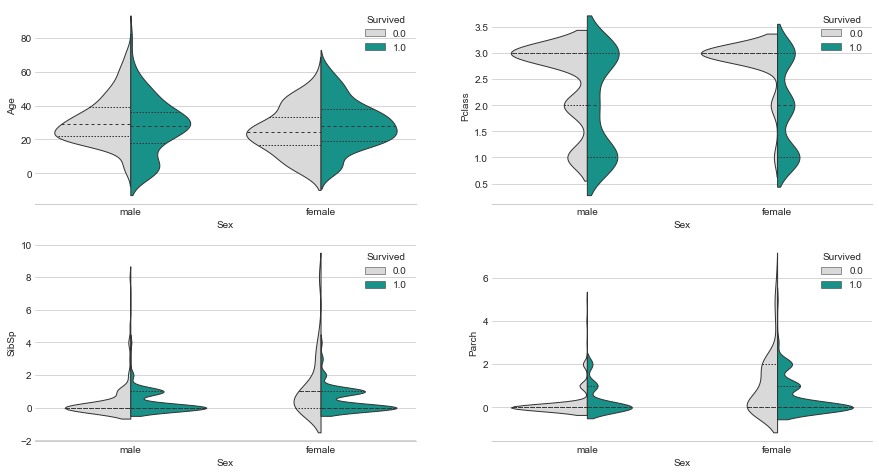

In [133]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.violinplot(data=df_all, x="Sex", y="Age", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)
plt.subplot(2,2,2)
sns.violinplot(data=df_all, x="Sex", y="Pclass", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)
plt.subplot(2,2,3)
sns.violinplot(data=df_all, x="Sex", y="SibSp", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)
plt.subplot(2,2,4)
sns.violinplot(data=df_all, x="Sex", y="Parch", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)

# 由上图可以得出以下结论：
1. 不同生存情况下，男女性别在年龄分布中相似。
2. 不同舱位生存比例不一，男女各舱位分布相似。
3. 女性获救乘员中，兄弟姐妹的影响似乎很大。

# 因此，下面我们着重看一下Pclass与生存的关系

<AxesSubplot:>

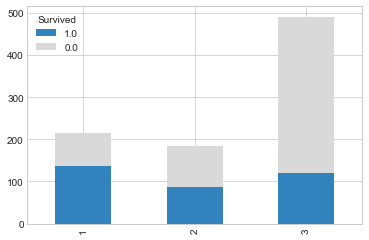

In [261]:
s_pclass= df_all['Survived'].groupby(df_all['Pclass'])
s_pclass = s_pclass.value_counts().unstack()
s_pclass= s_pclass[[1.0,0.0]]
s_pclass.index=['1','2','3']
s_pclass.plot(kind='bar',stacked = True, colormap='tab20c')

#显然，lower class的乘客死亡率较高

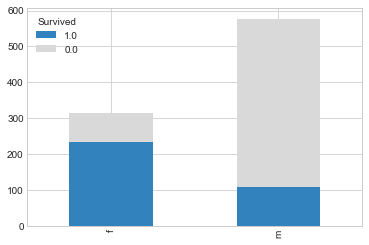

In [262]:
s_sex = df_all['Survived'].groupby(df_all['Sex'])
s_sex = s_sex.value_counts().unstack()
s_sex = s_sex[[1.0,0.0]]
s_sex.index=['f','m']
ax = s_sex.plot(kind='bar',stacked=True,colormap='tab20c')

#男性乘客幸存率远小于女性，窥见lady-first原则

Survived,1.0,0.0
f,233,81
m,109,468


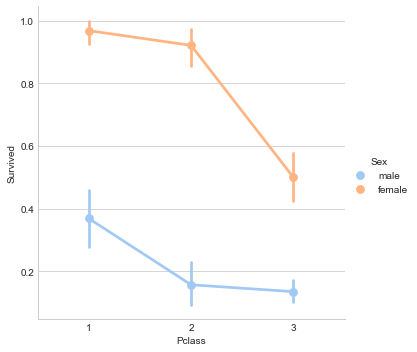

In [136]:
sns.catplot(x="Pclass",y='Survived', hue="Sex", kind="point",
            palette="pastel", edgecolor=".6",
            data=df_all)


#可见，性别和舱位对生存的影响很大，特别是性别

<AxesSubplot:>

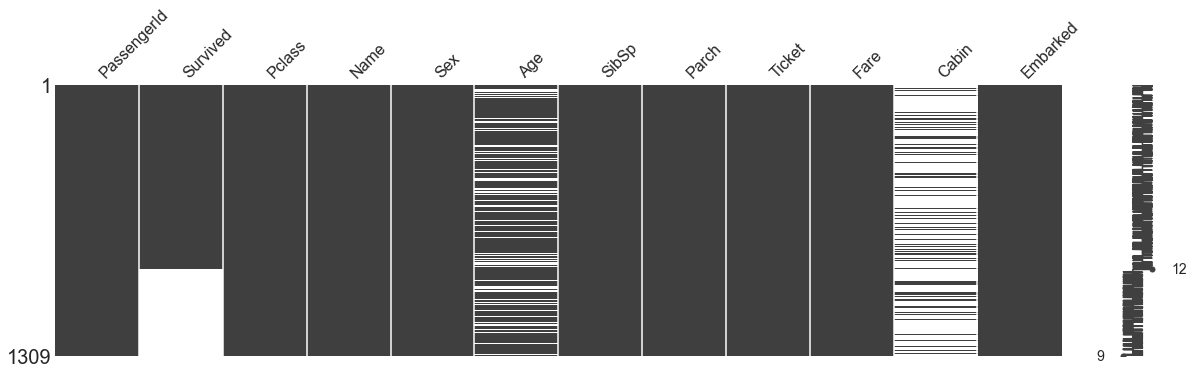

In [137]:
missingno.matrix(df_all, figsize = (20,5))

<AxesSubplot:>

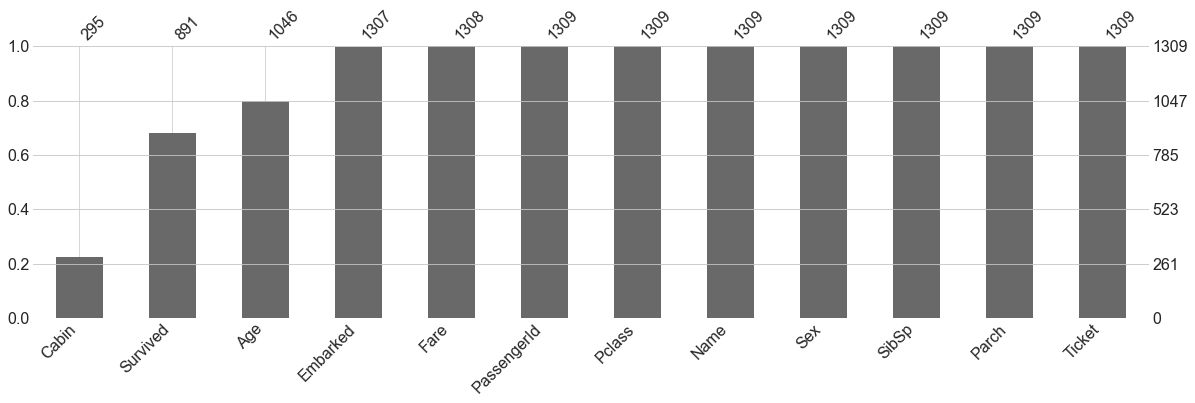

In [138]:
missingno.bar(df_all, sort='ascending', figsize = (20,5))

# 数据清洗

In [139]:
# 通过谷歌搜索唯二的两个乘客名字，可以得知登陆港口信息，不过这里我是引用gunesevitan的结论
df_all['Embarked'] = df_all['Embarked'].fillna('S')
df_all['Embarked'].head()

#对Cabin缺失值进行处理，利用U（Unknown）填充缺失值
df_all['Cabin']=df_all['Cabin'].fillna('U')
df_all['Cabin'].head()

#查看缺失值
df_all[df_all['Fare'].isnull()]

#假设船票价和Cabin,Pclass以及Embarked有关(按照常理推断)
df_all['Fare']=df_all['Fare'].fillna(df_all[(df_all['Pclass']==3)&(df_all['Embarked']=='S')&(df_all['Cabin']=='U')]['Fare'].mean())

In [140]:
# 因为Age项缺失较多，所以不能直接将其填充为众数或者平均数。常见有两种填充法，一是根据Title项中的Mr、Master、Miss等称呼的平均年龄填充，
#或者综合几项（Sex、Title、Pclass）的Age均值。
# 二是利用其他组特征量，采用机器学习算法来预测Age，本例采用的是第二种方法。


#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_df = df_all.iloc[:,[1,2,4,5,6,7,8,9,10,11]]
missing_age_df['Sex']= missing_age_df['Sex'].factorize()[0]
missing_age_df['Embarked']= missing_age_df['Embarked'].factorize()[0]
missing_age_df['Cabin']= missing_age_df['Cabin'].factorize()[0]
missing_age_df.corr()['Age'].sort_values(0)



Pclass     -0.408106
SibSp      -0.243699
Parch      -0.150917
Survived   -0.077221
Sex        -0.063645
Embarked    0.047410
Fare        0.177531
Cabin       0.272991
Age         1.000000
Name: Age, dtype: float64

In [141]:
missing_age_df = pd.DataFrame(missing_age_df[['Age', 'Parch','SibSp','Fare', 'Pclass','Cabin']])

age_train=missing_age_df[missing_age_df['Age'].notnull()]
age_test=missing_age_df[missing_age_df['Age'].isnull()]

#生成训练数据的特征和标签
age_train_X=age_train.drop(['Age'],axis=1)
age_train_y=age_train['Age']
#生成测试数据的特征
age_test_X=age_test.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1, n_estimators=2000, n_jobs=-1)
rfr.fit(age_train_X,age_train_y)

#模型得分
print('模型得分：',rfr.score(age_train_X,age_train_y))

模型得分： 0.6871636176641064


<AxesSubplot:>

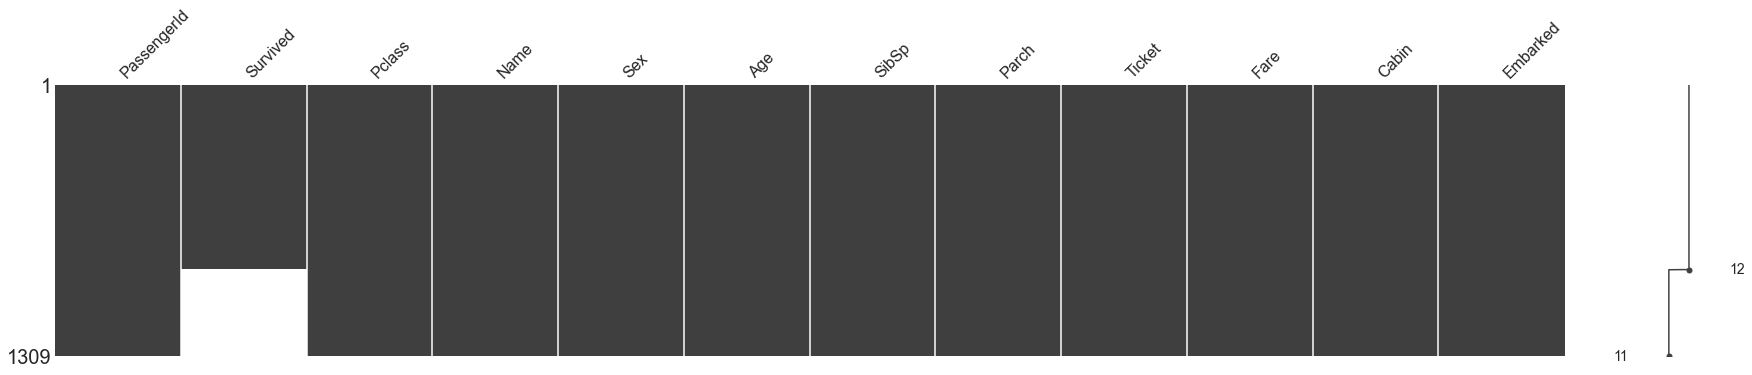

In [142]:
#预测年龄
age_test_y=rfr.predict(age_test_X)
#填充预测数据
df_all.loc[df_all['Age'].isnull(),['Age']]=age_test_y
# 缺失值显示
missingno.matrix(df_all, figsize = (30,5))

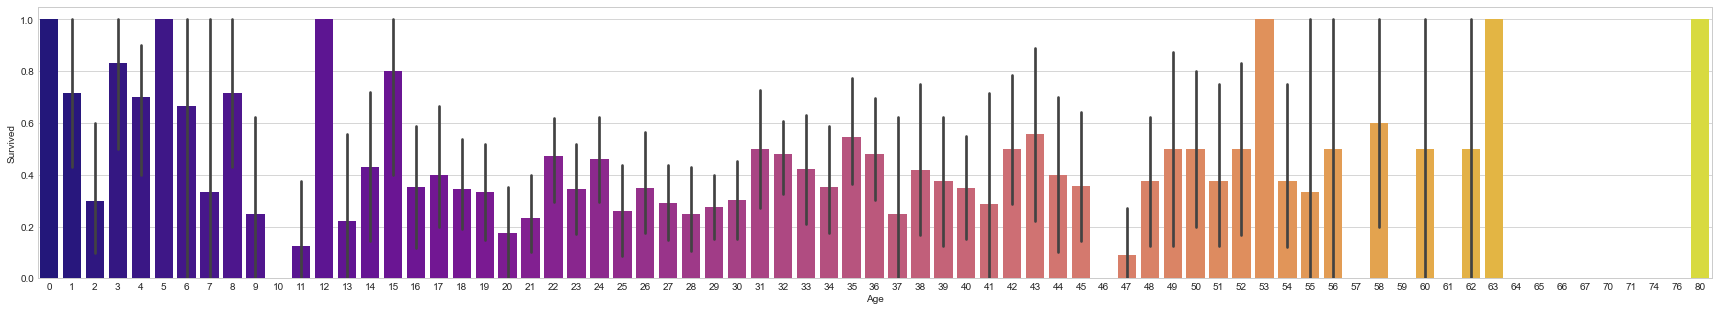

In [143]:
#填补完age来看一下age对生存的影响

df_all['Age'] = df_all['Age'].astype(int)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(30,5)) 
sns.barplot(x="Age", y='Survived',data=df_all,palette='plasma');


#影响不是特别大，整体来说，儿童/青少年生存率较大

# 特征工程

In [144]:
# 展示所有种类型特征
df_all.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309
unique,1307,2,929,187,3
top,"Kelly, Mr. James",male,CA. 2343,U,S
freq,2,843,11,1014,916


<AxesSubplot:xlabel='Cabin', ylabel='count'>

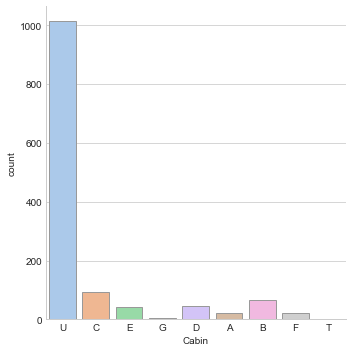

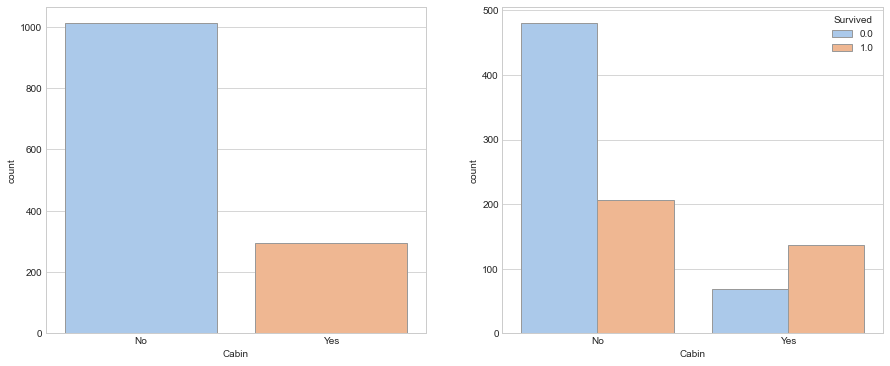

In [145]:
# Cabin
# 由于有大量的缺失值，我们采取二分类的方式进行特征转换

df_all['Cabin'] = df_all['Cabin'].apply(lambda x:x[0])
sns.catplot(x="Cabin", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_all)


df_all.loc[ (df_all.Cabin !='U'), 'Cabin' ] = "Yes"
df_all.loc[ (df_all.Cabin =='U'), 'Cabin' ] = "No"

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,6)) 
plt.subplot(1,2,1)
sns.countplot(x="Cabin",
            palette="pastel", edgecolor=".6",
            data=df_all)
plt.subplot(1,2,2)
sns.countplot(x="Cabin", hue="Survived",palette="pastel", edgecolor=".6",
            data=df_all)


#通过对Cabin的二分类，发现有没有Cabin的乘客幸存率是有差异的

In [146]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,No,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Yes,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Yes,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29,0,0,A.5. 3236,8.0500,No,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,Yes,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,No,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29,0,0,359309,8.0500,No,S


In [147]:
#将类别型数据转换为0，1数据



dummies_Cabin = pd.get_dummies(df_all['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(df_all['Embarked'], prefix= 'Embarked')


dummies_Sex = pd.get_dummies(df_all['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(df_all['Pclass'], prefix= 'Pclass')

df = pd.concat([df_all, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [148]:
#将数值型数据进行归一化

import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0.0,22,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.573587,-0.503292
1,2,1.0,38,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.617137,0.734743
2,3,1.0,26,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.275906,-0.490242
3,4,1.0,35,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.393876,0.383183
4,5,0.0,35,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.393876,-0.487825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,29,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825
1305,1306,NaN,39,0,0,108.9000,0,1,1,0,0,1,0,1,0,0,0.691557,1.462033
1306,1307,NaN,38,0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0.617137,-0.503292
1307,1308,NaN,29,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825


In [149]:
#

df.drop(['Age','Fare'], axis=1, inplace=True)
df

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0.0,1,0,1,0,0,0,1,0,1,0,0,1,-0.573587,-0.503292
1,2,1.0,1,0,0,1,1,0,0,1,0,1,0,0,0.617137,0.734743
2,3,1.0,0,0,1,0,0,0,1,1,0,0,0,1,-0.275906,-0.490242
3,4,1.0,1,0,0,1,0,0,1,1,0,1,0,0,0.393876,0.383183
4,5,0.0,0,0,1,0,0,0,1,0,1,0,0,1,0.393876,-0.487825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825
1305,1306,NaN,0,0,0,1,1,0,0,1,0,1,0,0,0.691557,1.462033
1306,1307,NaN,0,0,1,0,0,0,1,0,1,0,0,1,0.617137,-0.503292
1307,1308,NaN,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825


In [265]:
df.head().to_csv("D:\FileRecv\data.csv")

In [150]:
df_train=df[df['Survived'].notnull()]
train_y=df_train.iloc[:,1]
train_x=df_train.iloc[:,2:]

df_test=df[df['Survived'].isnull()]
test_x=df_test.iloc[:,2:]


test_x

,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
891,0,0,1,0,0,1,0,0,1,0,0,1,0.319456,-0.492094
892,1,0,1,0,0,0,1,1,0,0,0,1,1.286919,-0.508126
893,0,0,1,0,0,1,0,0,1,0,1,0,2.403223,-0.456165
894,0,0,1,0,0,0,1,0,1,0,0,1,-0.201486,-0.475983
895,1,1,1,0,0,0,1,1,0,0,0,1,-0.573587,-0.405896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825
1305,0,0,0,1,1,0,0,1,0,1,0,0,0.691557,1.462033
1306,0,0,1,0,0,0,1,0,1,0,0,1,0.617137,-0.503292
1307,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825


In [151]:
data=pd.read_csv("gender_submission.csv")
test_y=data.iloc[:,1]

sum(test_y)/len(test_y)

0.36363636363636365

In [152]:
#计算相关系数
df_train.corr()["Survived"].sort_values(ascending=False)


Survived       1.000000
Sex_female     0.543351
Cabin_Yes      0.316912
Pclass_1       0.285904
Fare_scaled    0.257307
Embarked_C     0.168240
Pclass_2       0.093349
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age_scaled    -0.062699
Embarked_S    -0.149683
Cabin_No      -0.316912
Pclass_3      -0.322308
Sex_male      -0.543351
Name: Survived, dtype: float64

In [37]:
train_y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

# 逻辑回归

In [74]:
#baseline

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

train_pred=model.predict(train_x)
test_pred=model.predict(test_x)
sum(train_pred==train_y)/len(train_pred)
#训练集准确率81.8%
sum(test_pred==test_y)/len(test_pred)
#测试集准确率92.8%





0.9282296650717703

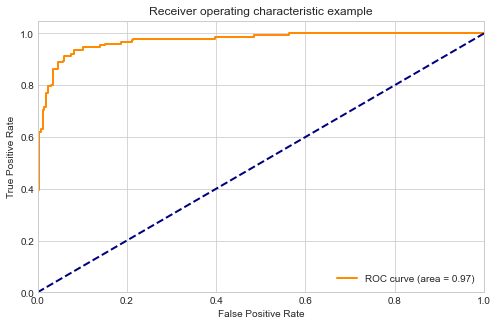

confusion_matrix of train：


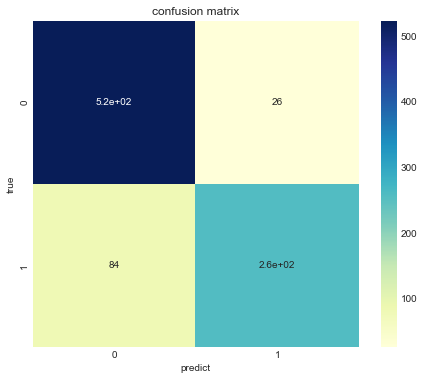

confusion_matrix of train：


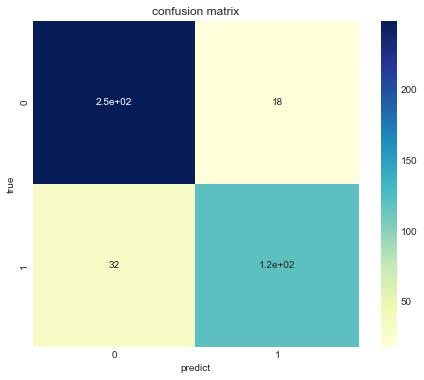

train:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       549
         1.0       0.79      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.82      0.82      0.82       891

test:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.90      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [277]:
model=LogisticRegression()
lr_result=estimator(train_x,train_y,test_x,test_y,model)
lr_result.roc_curve()
lr_result.confusion_matrix()
lr_result.Evaluation_indicators()

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve, auc, recall_score, classification_report

#在l2范式下，判断C和solver的最优值
p = {
    'C':list(np.linspace(0.05,1,19)),
    'solver':['liblinear','sag','newton-cg','lbfgs']}

model = LogisticRegression(penalty='l2',max_iter=10000)
GS = GridSearchCV(model,p,cv=5)
GS.fit(train_x,train_y)
#输出最优参数
GS.best_params_


{'C': 0.15555555555555556, 'solver': 'sag'}

In [85]:
model1=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)
model1.fit(train_x,train_y)
train_pred=model1.predict(train_x)
test_pred=model1.predict(test_x)


#训练集:82%
print(classification_report(train_y, train_pred))
#测试集:93%
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       549
         1.0       0.79      0.71      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.89      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



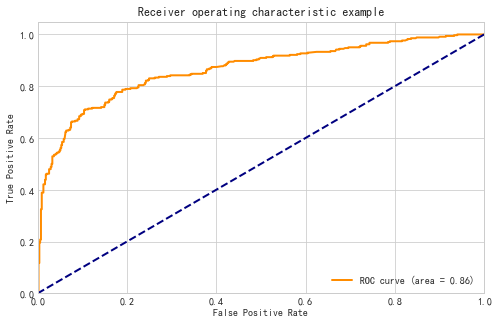

confusion_matrix of train：


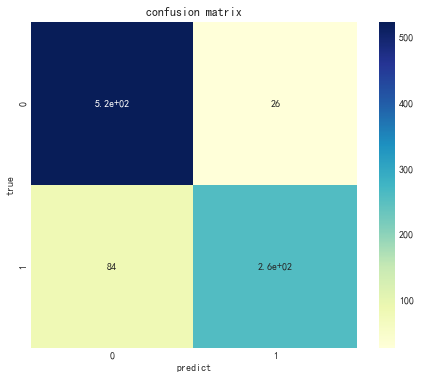

confusion_matrix of test：


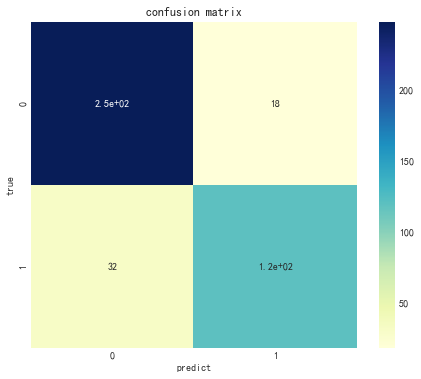

train:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       549
         1.0       0.79      0.71      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891

test:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.89      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [313]:
model1=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)

lr_result=estimator(train_x,train_y,test_x,test_y,model1)
lr_result.roc_curve()
lr_result.confusion_matrix()
lr_result.Evaluation_indicators()

# 随机森林

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [86]:
rf1 = RandomForestClassifier()
rf1.fit(train_x,train_y)

train_pred=rf1.predict(train_x)
test_pred=rf1.predict(test_x)


#训练集:98%
print(classification_report(train_y, train_pred))
#测试集:81%
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       549
         1.0       0.99      0.97      0.98       342

    accuracy                           0.98       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       266
           1       0.73      0.78      0.75       152

    accuracy                           0.81       418
   macro avg       0.80      0.81      0.80       418
weighted avg       0.82      0.81      0.81       418



0.819338327091136 191


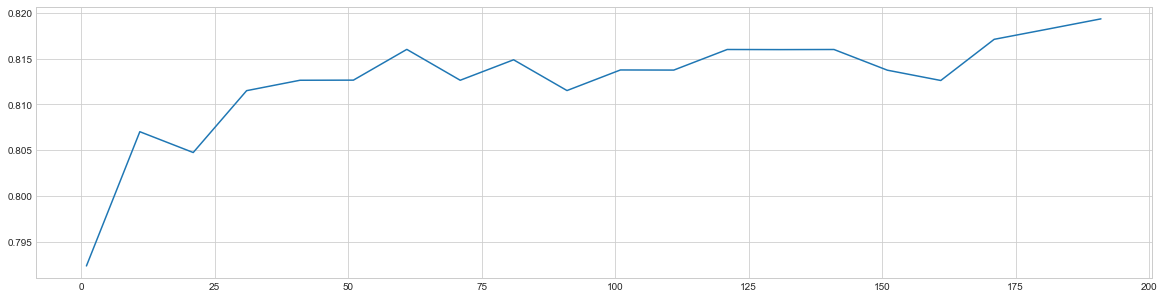

In [88]:
from sklearn.model_selection import cross_val_score #交叉验证
## 随机森林调整的第一步：无论如何先来调n_estimators，以10为分隔点
scorel = []
for i in range(0,200,10):
    RFC = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(RFC,train_x,train_y,cv=10).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)  #作图反映出准确度随着估计器数量的变化，121的附近最好
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()


0.8204619225967541 193


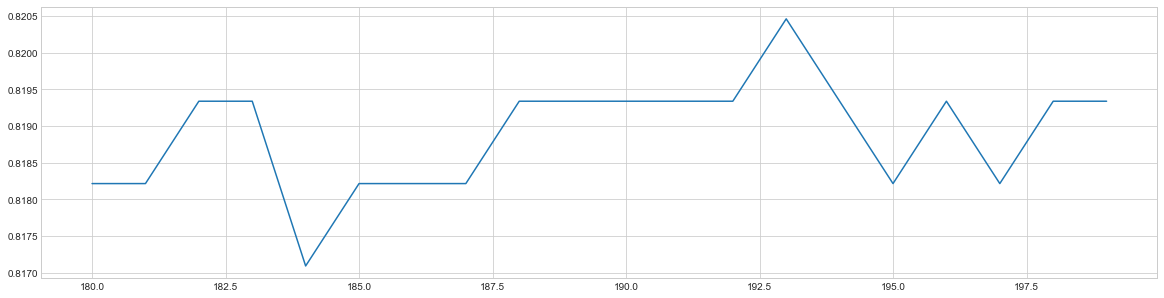

In [91]:
#根据上面的显示最优点在191附近，进一步细化学习曲线，在180-200之间寻找具体数值。

## 根据上面的显示最优点在191附近，进一步细化学习曲线
scorel = []
for i in range(180,200):
    RFC = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(RFC,train_x,train_y,cv=10).mean()
    scorel.append(score)

print(max(scorel),([*range(180,200)][scorel.index(max(scorel))]))  #112是最优的估计器数量 #最优得分是0.98945
plt.figure(figsize=[20,5])
plt.plot(range(180,200),scorel) 
plt.show()


In [94]:
#　这样我们得到了最佳的弱学习器迭代次数，接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(10,101,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, random_state=90),
   param_grid = param_test2,cv=5)
gsearch2.fit(train_x,train_y)


gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 13, 'min_samples_split': 10}, 0.8260561170045821)

In [95]:
rf1 = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90)
rf1.fit(train_x,train_y)


train_pred=rf1.predict(train_x)
test_pred=rf1.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率89%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率85%

0.8978675645342312
0.8588516746411483


In [97]:
# 对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。
# 下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。


param_test3 = {'min_samples_split':range(40,150,20), 'min_samples_leaf':range(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_test3, cv=5)


gsearch3.fit(train_x,train_y)


gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 10, 'min_samples_split': 40}, 0.8069675475488042)

In [99]:

param_test3 = {'min_samples_split':range(30,50,5), 'min_samples_leaf':range(1,20,5)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_test3, cv=5)


gsearch3.fit(train_x,train_y)


gsearch3.best_params_, gsearch3.best_score_


#效果不是很好，选择默认值

({'min_samples_leaf': 1, 'min_samples_split': 40}, 0.8159437574540205)

In [100]:
param_grid = {'criterion':['gini', 'entropy']}

gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_grid, cv=5)


gsearch4.fit(train_x,train_y)


gsearch4.best_params_, gsearch4.best_score_


#选择默认值

({'criterion': 'gini'}, 0.8260561170045821)

In [101]:
param_grid = {'max_features':range(1,11,2)}
gsearch5 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_grid, cv=5)


gsearch5.fit(train_x,train_y)


gsearch5.best_params_, gsearch5.best_score_

({'max_features': 9}, 0.8361433682756889)

In [103]:
param_grid = {'max_features':range(6,11,1)}
gsearch5 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_grid, cv=5)


gsearch5.fit(train_x,train_y)


gsearch5.best_params_, gsearch5.best_score_

({'max_features': 10}, 0.8395141547925429)

In [104]:
rf2 = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)
rf2.fit(train_x,train_y)


train_pred=rf2.predict(train_x)
test_pred=rf2.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率91%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率86%

0.9124579124579124
0.868421052631579


In [326]:
forest = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)
forest.fit(train_x, train_y)
score = forest.score(test_x, test_y)  # score=0.98148
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(train_x.shape[1]):   # x_train.shape[1]=13
    print(" %-*s & %.3f\\\\" % \
          ( 30, train_x.columns[indices[f]], importances[indices[f]]))


 Sex_female                     & 0.217\\
 Age_scaled                     & 0.185\\
 Sex_male                       & 0.180\\
 Fare_scaled                    & 0.176\\
 Pclass_3                       & 0.089\\
 SibSp                          & 0.042\\
 Cabin_No                       & 0.021\\
 Cabin_Yes                      & 0.020\\
 Embarked_S                     & 0.016\\
 Parch                          & 0.016\\
 Pclass_1                       & 0.014\\
 Embarked_C                     & 0.008\\
 Pclass_2                       & 0.008\\
 Embarked_Q                     & 0.007\\


confusion_matrix of train：


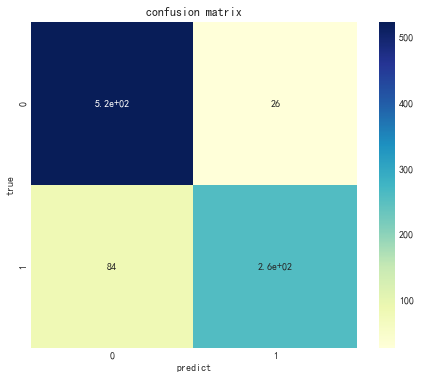

confusion_matrix of test：


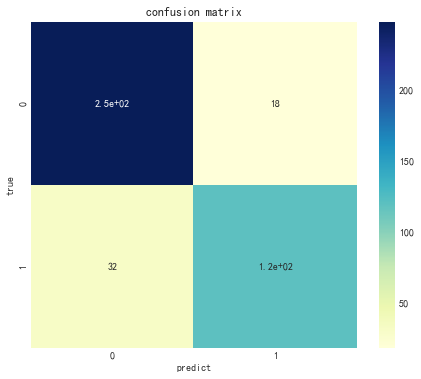

train:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       549
         1.0       0.93      0.83      0.88       342

    accuracy                           0.91       891
   macro avg       0.92      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891

test:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       266
           1       0.83      0.80      0.81       152

    accuracy                           0.87       418
   macro avg       0.86      0.85      0.86       418
weighted avg       0.87      0.87      0.87       418



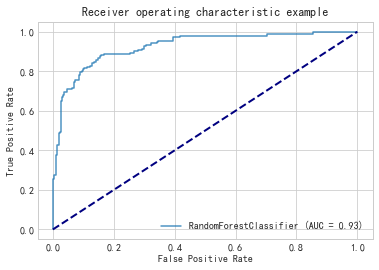

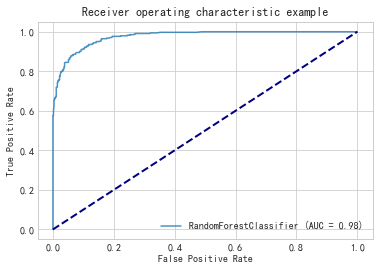

In [311]:
rf2 = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)

rf_result=estimator(train_x,train_y,test_x,test_y,rf2)

rf_result.confusion_matrix()
rf_result.Evaluation_indicators()
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rf2,test_x,test_y, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ax = plt.gca()
rfc_disp = plot_roc_curve(rf2,train_x,train_y, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_x,train_y)


train_pred=knn.predict(train_x)
test_pred=knn.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率87%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率81%

0.8754208754208754
0.8133971291866029


In [111]:

param_test = {'n_neighbors':list(range(1,11,2))}
gsearch = GridSearchCV(estimator = KNeighborsClassifier(),
   param_grid = param_test, cv=5)


gsearch.fit(train_x,train_y)


gsearch.best_params_, gsearch.best_score_

({'n_neighbors': 5}, 0.8148013307388112)

In [113]:
param_test = {'n_neighbors':list(range(4,7))}
gsearch = GridSearchCV(estimator = KNeighborsClassifier(),
   param_grid = param_test, cv=5)


gsearch.fit(train_x,train_y)


gsearch.best_params_, gsearch.best_score_

({'n_neighbors': 5}, 0.8148013307388112)

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_x,train_y)


train_pred=knn.predict(train_x)
test_pred=knn.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率87%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率81%

0.8608305274971941
0.8421052631578947


# 投票

In [106]:
from sklearn.ensemble import VotingClassifier

estimators=[]
estimators.append(('lgr',model1))
estimators.append(('rfc',rf2))

vc=VotingClassifier(voting='hard',estimators=estimators)
vc.fit(train_x,train_y)

train_pred=vc.predict(train_x)
test_pred=vc.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率86%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率89%


0.8641975308641975
0.8947368421052632


In [330]:
estimators=[]
estimators.append(('lgr',model1))
estimators.append(('rfc',rf2))
estimators.append(('knn',knn))

vc=VotingClassifier(voting='hard',estimators=estimators,weights=[3,3,1])
vc.fit(train_x,train_y)

train_pred=vc.predict(train_x)
test_pred=vc.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率86%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率89%


0.877665544332211
0.8923444976076556


confusion_matrix of train：


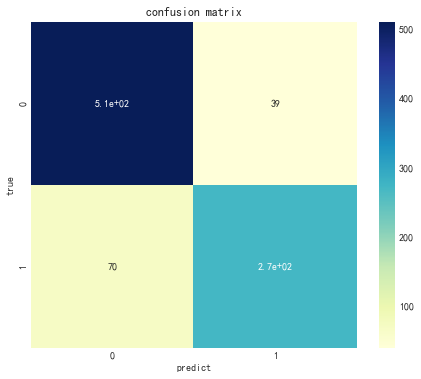

confusion_matrix of test：


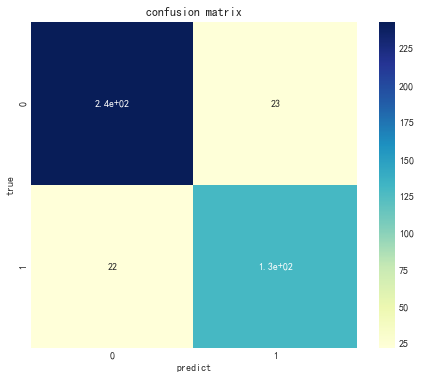

train:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       549
         1.0       0.87      0.80      0.83       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891

test:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       266
           1       0.85      0.86      0.85       152

    accuracy                           0.89       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.89      0.89       418



In [333]:
final_result=estimator(train_x,train_y,test_x,test_y,vc)
#final_result.roc_curve()
final_result.confusion_matrix()
print("train:")
print(classification_report(train_y,train_pred))
print("test:")
print(classification_report(test_y,test_pred))





In [312]:
#结果展现  类的定义
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

class estimator():
    def __init__(self,train_x,train_y,test_x,test_y,clf):
        try:
            self.train_x=train_x
            self.train_y=train_y
            self.test_x=test_x
            self.test_y=test_y
            #模型拟合
            self.model=clf.fit(train_x,train_y)
            self.train_pred=self.model.predict(train_x)
            self.test_pred=self.model.predict(test_x)
        except ValueError as e:
            print(e)
            print("传入参数维度可能不匹配！")
            
        
    def roc_curve(self):
        test_y_score = self.model.decision_function(self.train_x)
        prediction = self.model.predict(self.train_x)

        # Compute ROC curve and ROC area for each class
        fpr, tpr, threshold = roc_curve(self.train_y, test_y_score)  ###计算真正率和假正率
        roc_auc = auc(fpr, tpr)  ###计算auc的值

        lw = 2
        plt.figure(figsize=(8, 5))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
    def confusion_matrix(self):
        C = confusion_matrix(np.array(train_y),train_pred) 
        C1 = confusion_matrix(np.array(test_y),test_pred) 
        print("confusion_matrix of train：")
        fig, ax = plt.subplots(figsize = (8,6))
        sns.heatmap(C,annot=True,ax=ax,square=True,cmap='YlGnBu') #画热力图
        ax.set_title('confusion matrix') #标题
        ax.set_xlabel('predict') #x轴
        ax.set_ylabel('true') #y轴
        plt.show()
        
       
        print("confusion_matrix of test：")
        fig, ax = plt.subplots(figsize = (8,6))
        sns.heatmap(C1,annot=True,ax=ax,square=True,cmap='YlGnBu') #画热力图
        ax.set_title('confusion matrix') #标题
        ax.set_xlabel('predict') #x轴
        ax.set_ylabel('true') #y轴
        plt.show()
        
        
    def Evaluation_indicators(self):
        print("train:")
        print(classification_report(self.train_y, self.train_pred))
        print("test:")
        print(classification_report(self.test_y, self.test_pred))

    



In [276]:
estimator(train_x[:20],train_y,test_x,test_y,lr)

Found input variables with inconsistent numbers of samples: [20, 891]
传入参数维度可能不匹配！


In [162]:
vc=VotingClassifier(voting='hard',estimators=estimators,weights=[4,3,1])

lr=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)

knn=KNeighborsClassifier(n_neighbors=5)

rfc=RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)

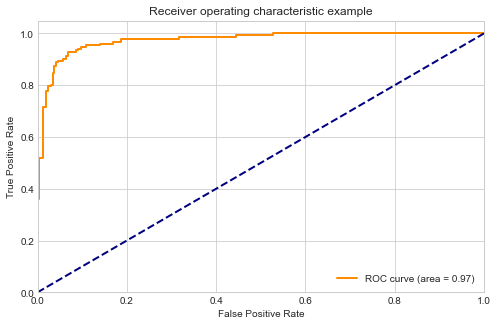

confusion_matrix of train：


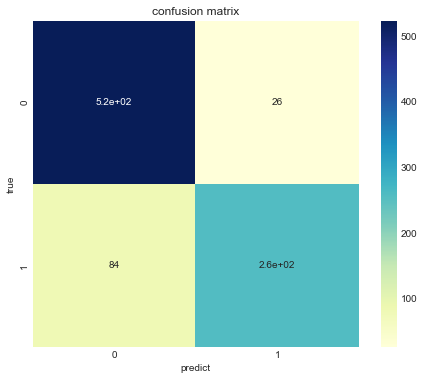

confusion_matrix of train：


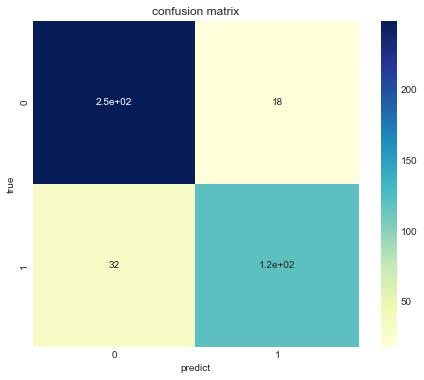

train:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       549
         1.0       0.79      0.71      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891

test:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.89      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [227]:
lr_result=estimator(train_x,train_y,test_x,test_y,lr)
lr_result.roc_curve()
lr_result.confusion_matrix()
lr_result.Evaluation_indicators()


# xgboost

In [41]:
import xgboost as xgb
gbm = xgb.XGBClassifier(silent=1, max_depth=10, n_estimators=1000, learning_rate=0.05)
gbm.fit(train_x, train_y)


[10:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [174]:
train_pred=gbm.predict(train_x)
test_pred=gbm.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率98.43%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率83.49%

0.9842873176206509
0.8349282296650717


In [ ]:
我们看到在建立xgboost的模型时，有很多参数，这些参数是什么意思呢，我们来看一下。

一般参数
这些参数用来控制XGBoost的整体功能，是一些通用的设置，有的时候都不用调整。
（1）booster[默认gbtree]
每次迭代的模型选择，有两个gbtree：基于树的模型和gbliner：线性模型，显然我们一般都会选择gbtree。
（2）silent[默认0]
是否开启静默模式，0为不开启，1为开启，开启后不输出任何信息，显然这不利于我们调参，默认选0就好了。
（3）nthread[默认取最大线程数]
这个参数用来控制最大并行的线程数，如果你希望取得所有CPU的核，那么你就不用管它。
booster参数或者说树的参数
这些参数是要重点调整的，比较重要，主要是用来控制每一步树的生成。
（1）eta [default=0.3]
学习率参数，就是原理中说的缩减，保证每一颗树对于结果的影响不太大，从而保证模型的效果。更新叶子节点权重时，乘以该系数，避免步长过大。参数值越大，越可能无法收敛。把学习率 eta 设置的小一些，小学习率可以使得后面的学习更加仔细。 典型值为0.01-0.2。
（2）min_child_weight [default=1]
大家对他的解释是决定最小叶子节点样本权重和，不太好理解。看了一些解释的文章，这个值可以理解为H值，还记得H值吗，就是损失函数对y(t-1)的二阶导数和，那么如果损失函数是平方函数（回归问题），这个就是1，如果是对数损失函数（分类问题），导数是a(1-a)的形式，a代表sigmoid函数，这样的话当y预测值非常大的时候，这个式子的值接近于0，这当然是不好的，因此你要给他设定一个阈值，小于这个阈值就不分裂了。现在可以解释了，这个值代表所有样本二阶导数的和，和上边说的叶子得分不是一个事，如果是回归问题实际代表样本个数，如果是分类问题实际代表a(1-a)所有样本计算值的加和。
明白这个参数是啥以后，来看他是干嘛的，这个参数用于避免过拟合，当它的值较大时，可以避免模型学习到局部的特殊样本。举个栗子来说，对正负样本不均衡时的 0-1 分类而言，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本，实际是通过控制样本数来控制过拟合的。你们应该看出来这个值越小越容易过拟合，需要通过cv进行调整优化。
（3）max_depth [default=6]
这个没啥好说的，每棵树的最大深度，也是用来避免过拟合的，max_depth越大，模型会学到更具体更局部的样本，典型值3-10，要用cv调优。
（4）max_leaf_nodes
树上最大节点的数量，和上面的那个参数一样，如果定义了这个参数就会忽略掉max_depth参数，我们调优还是以max_depth为主吧。
（5）gamma[default=0]
一听这种希腊字母就知道是个系数，在树的叶子节点上作进一步分区所需的最小损失减少。越大，算法越保守。取值在[0,∞] 。通俗点讲就是，这个节点还划不划分，先看看损失减不减少了再说。同样需要cv调优。
（6）max_delta_step [default=0]
这参数限制每棵树权重改变的最大步长。如果这个参数的值为0，那就意味着没有约束。如果它被赋予了某个正值，那么它会让这个算法更加保守。通常，这个参数不需要设置。但是当各类别的样本十分不平衡时，它对逻辑回归是很有帮助的。也就是说这个参数不用管啊。
（7）subsample [default=1]
样本采样用的，减小这个参数的值，算法会更加保守，避免过拟合，但是如果这个值设置得过小，它可能会导致欠拟合。典型值：0.5-1。既然有个范围，给他个面子cv调优一把吧。
（8）colsample_bytree [default=1]
列采样，就是选择生成树的特征，前面介绍过了，和设置缩减率一样是为了干嘛来着，是为了防止过拟合的，一般设置为： 0.5-1 ，也要用cv拟合。
（9）colsample_bylevel[default=1]
等一下哈，这个怎么和上面参数这么像，哦，它是在上面树的基础上，对每一级进行分裂时对列（就是特征）进行采样，大神们都说这个参数不用用了，用上面那个就行了。
（10）lambda [default=1]
又是个系数，这个是控制L2正则的，就是目标函数里的那个叶子节点得分前边的系数，用不用看你自己了。
（11）alpha [default=0]
想必你也想到了吧，有L2就有L1，用不用全凭自己了。
（12） scale_pos_weight [default=1]
这个是控制样本均衡与否的，如果是不均衡样本，设置一个正数可以保证快速收敛，具体为什么，也没人解释，先留着吧。
（13）tree_method[default=’auto’]
还记得我说过树的生成有很多方法吧，他们介绍的老复杂了，别看了，人家自动给我们打包好了，有三个可选的值， {‘auto’, ‘exact’, ‘approx’} ，分别对应 贪心算法(小数据集)/近似算法(大数据集) 。



In [59]:
#调参
from sklearn.model_selection import GridSearchCV

cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}


xgb1 = GridSearchCV(estimator = xgb.XGBRegressor(**other_params),
                        param_grid = cv_params, scoring='roc_auc',cv=5)


xgb1.fit(train_x,train_y)


xgb1.best_params_, xgb1.best_score_

({'n_estimators': 400}, 0.8657059664778931)

In [58]:
cv_params = {'n_estimators': [100,200,300,400]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}


xgb1 = GridSearchCV(estimator = xgb.XGBRegressor(**other_params),
                        param_grid = cv_params, scoring='roc_auc',cv=5)


xgb1.fit(train_x,train_y)


xgb1.best_params_, xgb1.best_score_

({'n_estimators': 100}, 0.8777220668161935)

In [44]:
#这两个参数是控制树生成的，树的结构对于最终的结果影响还是很大的，所以这个放到第二个调整批次是应当的，两个参数可以一起调。

cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1,
 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb2 = GridSearchCV(estimator = xgb.XGBRegressor(**other_params),
                        param_grid = cv_params, scoring='roc_auc',cv=5)


xgb2.fit(train_x,train_y)


xgb2.best_params_, xgb2.best_score_


({'max_depth': 5, 'min_child_weight': 1}, 0.8777220668161935)

In [45]:
#gamma参数调优

cv_params = {  
    'gamma': [i / 10.0 for i in range(0, 5)]  
} 

other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1,
 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb3 = GridSearchCV(estimator = xgb.XGBRegressor(**other_params),
                        param_grid = cv_params, scoring='roc_auc',cv=5)


xgb3.fit(train_x,train_y)


xgb3.best_params_, xgb3.best_score_



({'gamma': 0.0}, 0.8777220668161935)

In [47]:
#调整subsample 和 colsample_bytree 参数 



cv_params = {  
    'subsample': [i / 10.0 for i in range(6, 10)],  
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]  
} 

other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1,
 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb4 = GridSearchCV(estimator = xgb.XGBRegressor(**other_params),
                        param_grid = cv_params, scoring='roc_auc',cv=5)


xgb4.fit(train_x,train_y)


xgb4.best_params_, xgb4.best_score_


({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.8777220668161935)

In [50]:
#正则化参数调优 reg_alpha和reg_lambda
cv_params = {  
 'reg_alpha':[1e-5,1e-4,1e-3, 1e-2, 0.1, 1],
     'reg_lambda':[1e-5,1e-4,1e-3, 1e-2, 0.1, 1, 100]

} 


other_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1,
 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb5 = GridSearchCV(estimator = xgb.XGBRegressor(**other_params),
                        param_grid = cv_params, scoring='roc_auc',cv=5)


xgb5.fit(train_x,train_y)


xgb5.best_params_, xgb5.best_score_


({'reg_alpha': 1e-05, 'reg_lambda': 1}, 0.8777220668161935)

In [65]:

def modelfit(alg,X, y,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
 
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='auc')
 
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
 
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
 
#    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')
#     plt.show()
    print ('n_estimators=',cvresult.shape[0])


In [68]:
def tun_parameters2(train_x,train_y):  #通过这个函数，确定树的个数
    xgb1 = xgb.XGBClassifier(learning_rate =0.01, n_estimators=100, max_depth=5, min_child_weight=1, 
    gamma=0.0, subsample=0.8, colsample_bytree=0.8,reg_alpha= 1e-05, objective= 'binary:logistic', nthread=8,
    scale_pos_weight=1,seed=27)
    modelfit(xgb1,train_x,train_y)  
tun_parameters2(train_x,train_y)


Model Report
Accuracy : 0.8721
AUC Score (Train): 0.915000
n_estimators= 100


In [70]:
gbm=xgb.XGBClassifier(learning_rate =0.01, n_estimators=100, max_depth=5, min_child_weight=1, 
    gamma=0.0, subsample=0.8, colsample_bytree=0.8,reg_alpha= 1e-05, objective= 'binary:logistic', nthread=8,
    scale_pos_weight=1,seed=27)
gbm.fit(train_x,train_y)


train_pred=gbm.predict(train_x)
test_pred=gbm.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率87%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率88%

[10:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8720538720538721
0.8827751196172249
